https://www.kaggle.com/jackdaoud/marketing-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline
sns.set_style('whitegrid')

pd.set_option('display.max_columns', None)

In [2]:
market_data = pd.read_csv("data/marketing_data.csv", parse_dates = ["Dt_Customer"])

In [3]:
market_data.info()
market_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2216 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


There is space infront of column name 'Income'.

In [4]:
market_data.columns = market_data.columns.str.replace(' ', '')

In [5]:
market_data['Income'] = market_data['Income'].str.replace("$", '').str.replace(',', '')
market_data['Income'] = market_data["Income"].astype('float')

In [6]:
market_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


## EDA

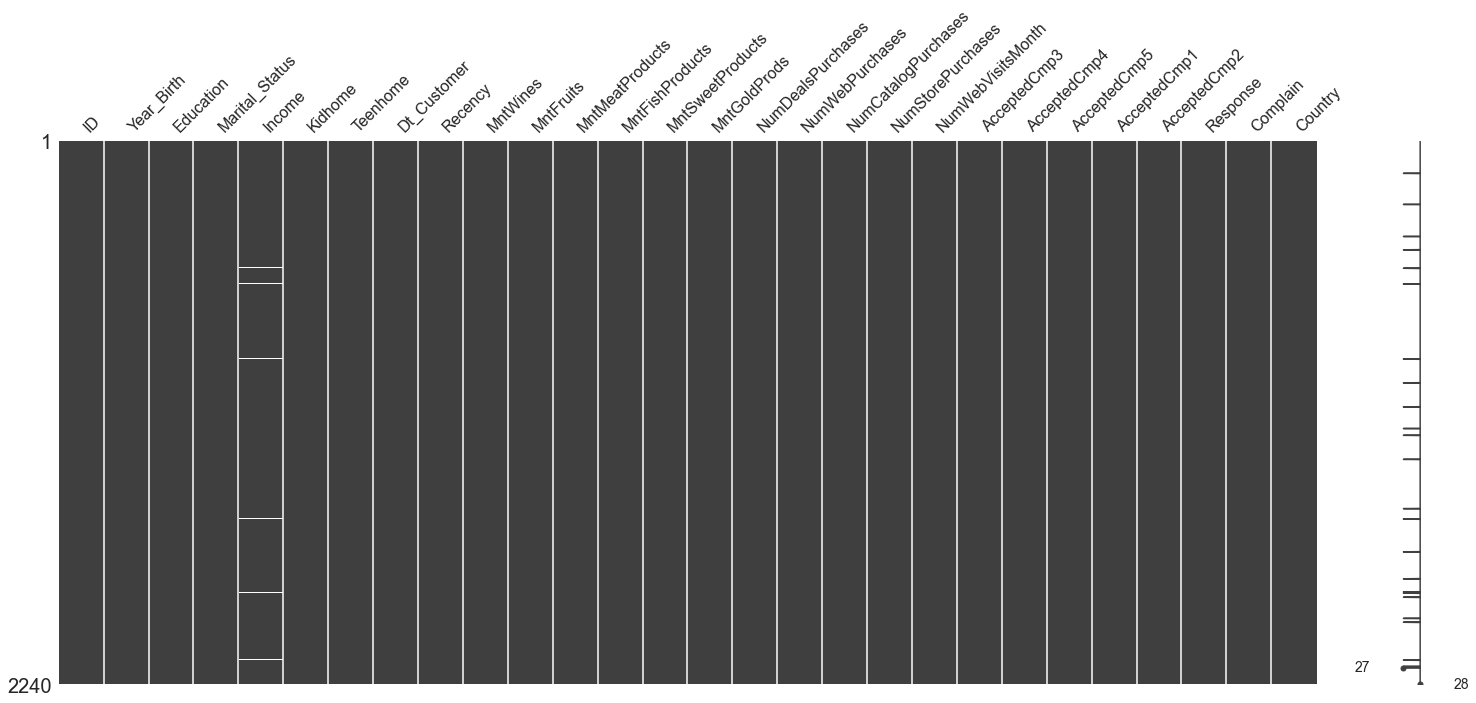

In [7]:
msno.matrix(market_data)

In [8]:
market_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

[Text(0.5, 1.0, 'boxplot of Income')]

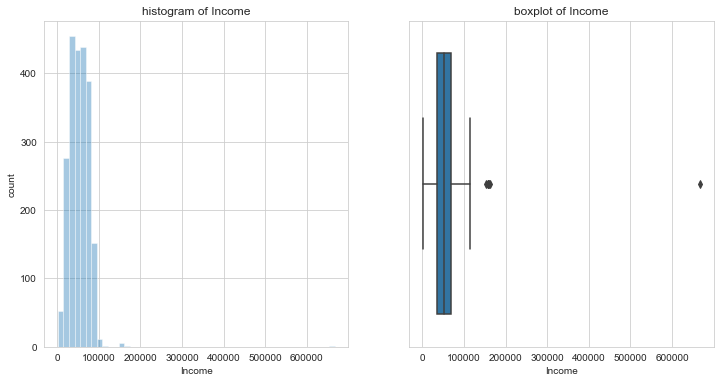

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 6)

sns.distplot(market_data['Income'], kde=False, ax=ax1)
sns.boxplot(market_data['Income'], ax=ax2)

ax1.set(title="histogram of Income", ylabel="count")
ax2.set(title="boxplot of Income")

There are outliers for Income, so we are going to use median value to fill any missing values.

### fill missing values with median value

In [10]:
print(market_data['Income'].median())
market_data["Income"] = market_data["Income"].fillna(market_data['Income'].median())

51381.5


### finding outliers that does not make sense

In [11]:
col_select = market_data.drop(
    columns=["ID", "Education", "Marital_Status", "Dt_Customer", "Country", "Response", 
             "Complain", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"])

Year_Birth                AxesSubplot(0.125,0.772143;0.168478x0.107857)
Income                 AxesSubplot(0.327174,0.772143;0.168478x0.107857)
Kidhome                AxesSubplot(0.529348,0.772143;0.168478x0.107857)
Teenhome               AxesSubplot(0.731522,0.772143;0.168478x0.107857)
Recency                   AxesSubplot(0.125,0.642714;0.168478x0.107857)
MntWines               AxesSubplot(0.327174,0.642714;0.168478x0.107857)
MntFruits              AxesSubplot(0.529348,0.642714;0.168478x0.107857)
MntMeatProducts        AxesSubplot(0.731522,0.642714;0.168478x0.107857)
MntFishProducts           AxesSubplot(0.125,0.513286;0.168478x0.107857)
MntSweetProducts       AxesSubplot(0.327174,0.513286;0.168478x0.107857)
MntGoldProds           AxesSubplot(0.529348,0.513286;0.168478x0.107857)
NumDealsPurchases      AxesSubplot(0.731522,0.513286;0.168478x0.107857)
NumWebPurchases           AxesSubplot(0.125,0.383857;0.168478x0.107857)
NumCatalogPurchases    AxesSubplot(0.327174,0.383857;0.168478x0.

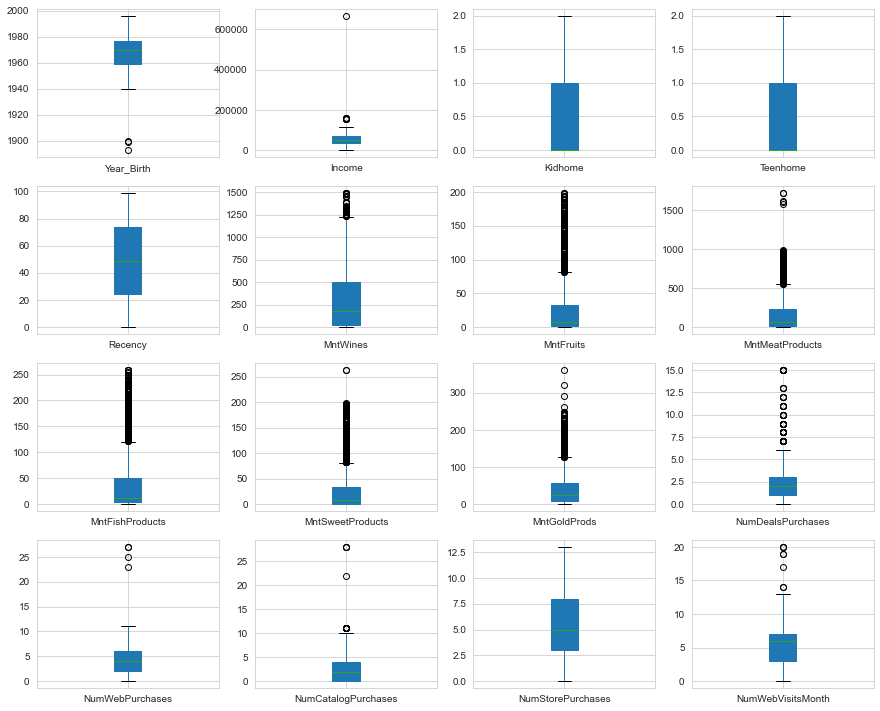

In [12]:
col_select.plot(subplots=True, layout=(6,4), kind='box', figsize=(15,19), patch_artist=True)

In [13]:
market_data = market_data[market_data["Year_Birth"] > 1920].reset_index(drop=True)

In [14]:
# number of children at home
market_data['Children'] = market_data['Kidhome'] + market_data['Teenhome']

# year customer registered
market_data['Year'] = market_data['Dt_Customer'].dt.year

# total amount
Mntcol = [col for col in market_data.columns if 'Mnt' in col]
market_data['MntTotal'] = market_data[Mntcol].sum(axis=1)

# total purchases
Purcol = [col for col in market_data.columns if 'Purchases' in col]
market_data['PurchaseTotal'] = market_data[Purcol].sum(axis=1)

# total offer accepted
Accpcol = [col for col in market_data.columns if 'Cmp' in col] + ['Response']
market_data['AccpTotal'] = market_data[Accpcol].sum(axis=1)

In [15]:
market_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Year,MntTotal,PurchaseTotal,AccpTotal
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,2014,1190,15,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,2014,577,18,2
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,1,2014,251,11,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,2,2014,11,4,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,1,2014,91,8,2


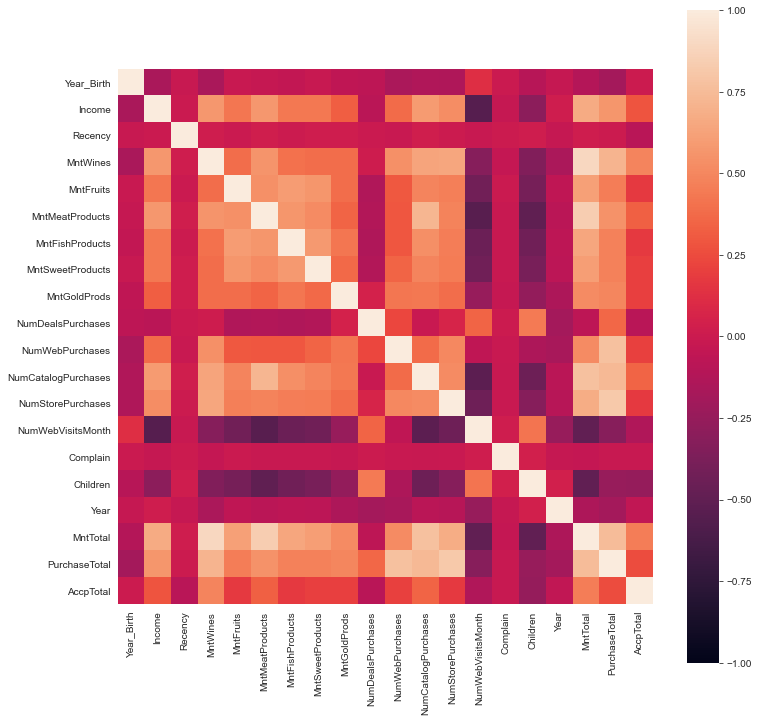

In [16]:
corrmat = market_data.drop(
    columns=['ID', 'Kidhome', 'Teenhome','Dt_Customer','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
             'AcceptedCmp4', 'AcceptedCmp5', 'Response']).select_dtypes(include=np.number)
corrmat = corrmat.corr()

fig, ax = plt.subplots()
fig.set_size_inches(12,12)

sns.heatmap(corrmat, square=True, vmax=1, vmin=-1)

There is extreme outliers on 'Income' so I will remove it

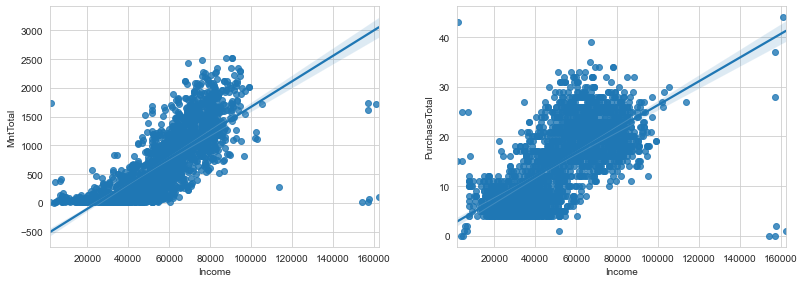

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
fig.tight_layout(pad=5)

sns.regplot(data=market_data[market_data['Income'] < 200000], x="Income", y="MntTotal", ax=ax1)
sns.regplot(data=market_data[market_data['Income'] < 200000], x="Income", y="PurchaseTotal", ax=ax2)

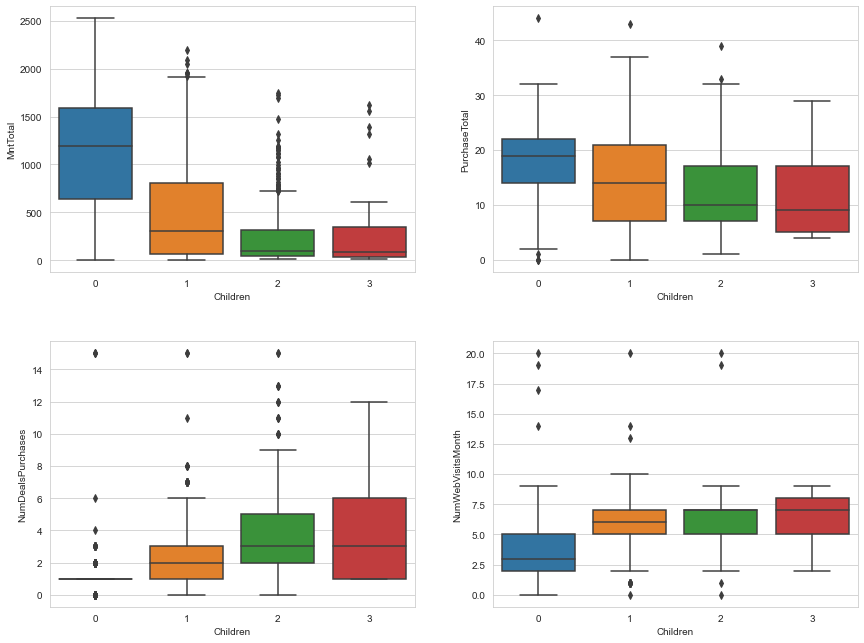

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows= 2, ncols=2)
fig.set_size_inches(13,10)
fig.tight_layout(pad=5)

sns.boxplot(data=market_data, x='Children', y='MntTotal', ax=ax1)
sns.boxplot(data=market_data, x='Children', y='PurchaseTotal', ax=ax2)
sns.boxplot(data=market_data, x='Children', y='NumDealsPurchases', ax=ax3)
sns.boxplot(data=market_data, x='Children', y='NumWebVisitsMonth', ax=ax4)

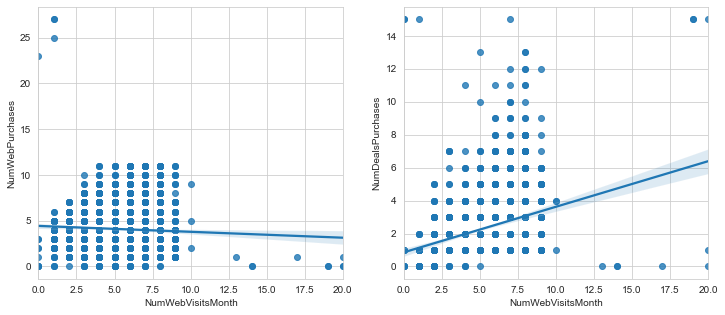

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.regplot(data=market_data, x='NumWebVisitsMonth', y='NumWebPurchases', ax=ax1)
sns.regplot(data=market_data, x='NumWebVisitsMonth', y='NumDealsPurchases', ax=ax2)

## statistical analysis

In [20]:
market_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Children', 'Year',
       'MntTotal', 'PurchaseTotal', 'AccpTotal'],
      dtype='object')

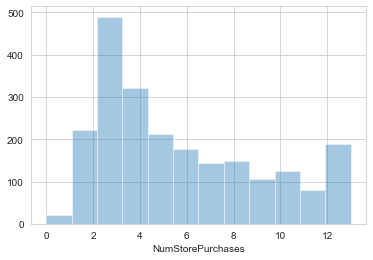

In [21]:
sns.distplot(market_data["NumStorePurchases"], kde=False, bins=12)

In [22]:
categ = market_data.select_dtypes(exclude=[np.number, np.datetime64])
categ.nunique()

Education         5
Marital_Status    8
Country           8
dtype: int64

In [23]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False).fit(categ)
cat_enc = pd.DataFrame(enc.transform(categ))
cat_enc.columns = enc.get_feature_names(categ.columns)

In [24]:
number = market_data.select_dtypes(include=np.number).drop(columns=['ID', 'Year_Birth'])
new_data = pd.concat([cat_enc, number], axis=1)
new_data.head()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Children,Year,MntTotal,PurchaseTotal,AccpTotal
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,0,2014,1190,15,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,0,2014,577,18,2
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,1,2014,251,11,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,2,2014,11,4,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,1,2014,91,8,2


## predict 'NumStorePurchases'

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
X = new_data.drop(columns='NumStorePurchases')
y = new_data['NumStorePurchases']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

In [29]:
np.sqrt(mean_squared_error(y_test, pred))

1.10003921843539e-11

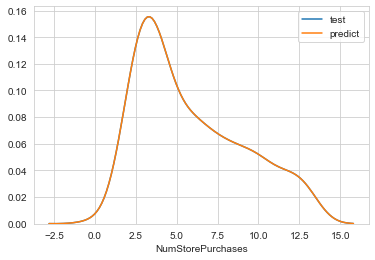

In [33]:
sns.distplot(y_test, hist=False, label="test")
sns.distplot(pred, hist=False, label='predict')

In [45]:
model.coef_

array([ 2.45443338e-13, -5.05004519e-12,  2.22217965e-12,  2.42160275e-12,
       -6.41472387e-13,  4.67333032e-12,  4.87454099e-12,  5.44127381e-12,
        4.20867890e-12, -9.89219742e-12, -3.38822459e-12, -1.71561813e-12,
       -4.04038794e-12, -2.75968680e-12, -5.17325733e-12,  4.85355062e-12,
       -6.49991012e-12,  3.48574402e-12,  7.66621628e-12,  2.60374381e-12,
       -3.62553658e-12, -2.66123186e-17, -1.40824972e-12, -8.27843480e-13,
       -1.70518241e-14, -4.46152984e-16,  2.26580437e-18,  8.94466943e-15,
        5.96824892e-16,  2.33242914e-15,  1.08478573e-14, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00,  1.52071968e-12,  3.39694210e-12,
       -3.51585253e-12,  2.36553175e-12,  1.99771789e-12,  9.90155801e-12,
       -1.24451987e-11, -1.50997006e-11, -2.23613928e-12,  9.77282270e-12,
        4.22838659e-16,  1.00000000e+00,  1.70087656e-12])

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=2021)
tree_model

DecisionTreeRegressor(random_state=2021)

In [35]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2021)

In [38]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(tree_model, X_train, y_train, cv=5, verbose=2, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [40]:
np.sqrt(mean_squared_error(y_train, y_predict))

1.5200470818334593

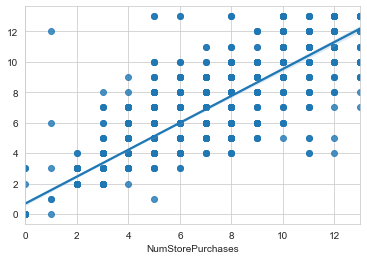

In [41]:
sns.regplot(y_train, y_predict)

In [42]:
from sklearn.metrics import r2_score
r2_score(y_train, y_predict)

0.7818881240059965

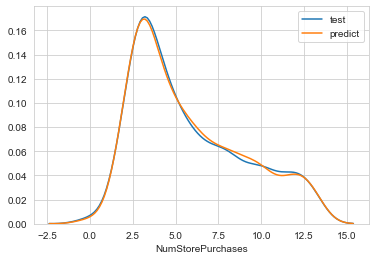

In [44]:
sns.distplot(y_train, hist=False, label="test")
sns.distplot(y_predict, hist=False, label='predict')

by country

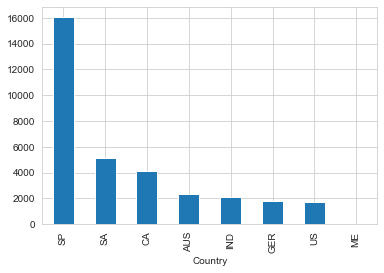

In [55]:
market_data.groupby('Country')['PurchaseTotal'].sum().sort_values(ascending=False).plot(kind='bar')

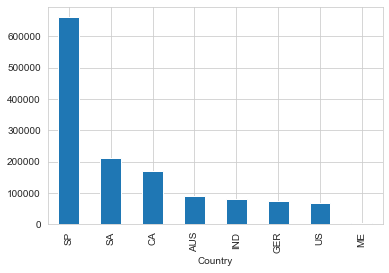

In [58]:
market_data.groupby('Country')['MntTotal'].sum().sort_values(ascending=False).plot(kind='bar')

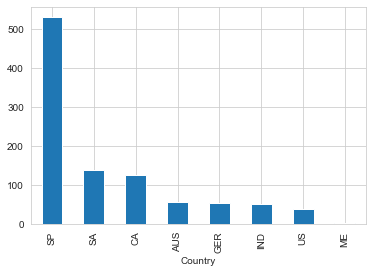

In [59]:
market_data.groupby('Country')['AccpTotal'].sum().sort_values(ascending=False).plot(kind='bar')

which campaign worked best

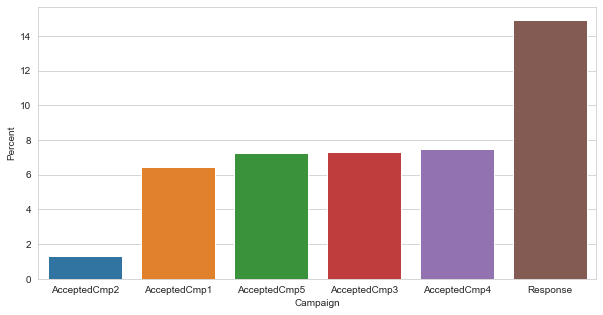

In [79]:
cam = pd.DataFrame(market_data[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response']].mean()*100).reset_index()
cam.columns = ['Campaign', 'Percent']

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.barplot(data=cam.sort_values('Percent'), x='Campaign', y='Percent')

In [82]:
market_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Children', 'Year',
       'MntTotal', 'PurchaseTotal', 'AccpTotal'],
      dtype='object')

On average

In [90]:
avg_data = round(market_data[['Year_Birth', 'Year', 'MntTotal', 
                              'Income', 'Children', 'Recency']].mean(), 2).reset_index()
avg_data.columns = ['feature', 'average']
avg_data

,feature,average
0,Year_Birth,1968.90
1,Year,2013.03
2,MntTotal,605.74
3,Income,52227.41
4,Children,0.95
5,Recency,49.10


In [103]:
mnt_cols = [col for col in market_data.columns if 'Mnt' in col]
mnt_cols.remove('MntTotal')

channel_cols = [col for col in market_data.columns if 'Num' in col]

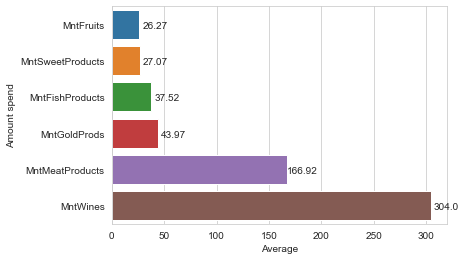

In [141]:
spending = pd.DataFrame(round(market_data[mnt_cols].mean(), 2),
                        columns=['Average']).sort_values('Average').reset_index()
spending.columns = ['Amount spend', 'Average']
ax = sns.barplot(data=spending, x='Average', y='Amount spend')

for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q + 15,
            y=p.get_y() + 0.5,
            s=q,
            ha="center") ;

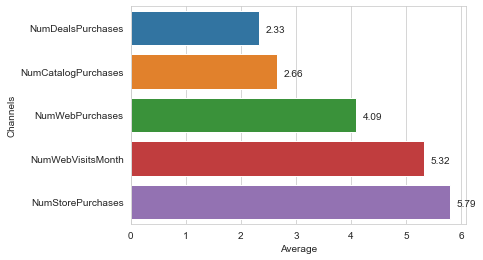

In [136]:
channel = pd.DataFrame(round(market_data[channel_cols].mean(), 2),
                       columns=['Average']).sort_values('Average').reset_index()
channel.columns = ['Channels', 'Average']
ax = sns.barplot(data=channel, x='Average', y='Channels')

for p,q in zip(ax.patches, channel['Average']):
    ax.text(x=q + 0.3,
            y=p.get_y() + 0.5,
            s=q,
            ha="center") ;